In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


<Axes: xlabel='price', ylabel='Count'>

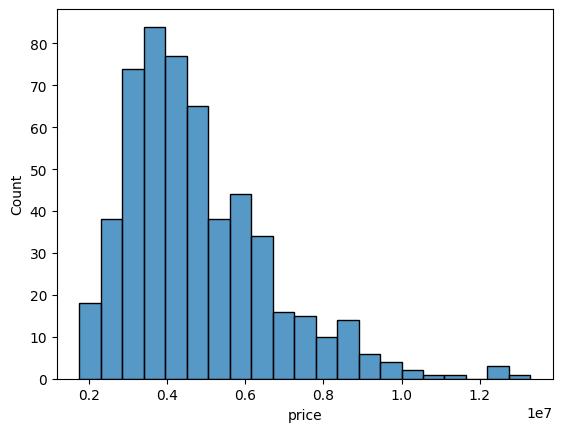

In [ ]:
sns.histplot(data=df , x = 'price')

<Axes: xlabel='bedrooms', ylabel='count'>

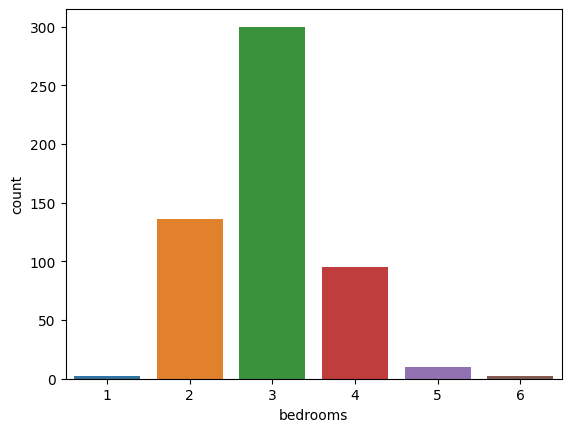

In [ ]:
sns.countplot(data = df , x='bedrooms')

<Axes: xlabel='bathrooms', ylabel='count'>

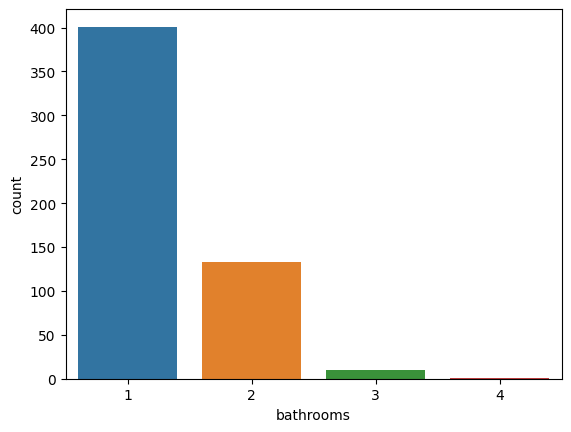

In [ ]:
sns.countplot(data =df , x = 'bathrooms')

<Axes: xlabel='area', ylabel='price'>

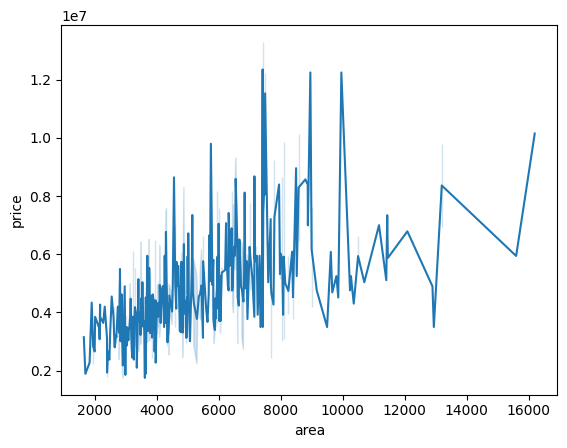

In [ ]:
sns.lineplot(data = df , x = 'area' , y = 'price')

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

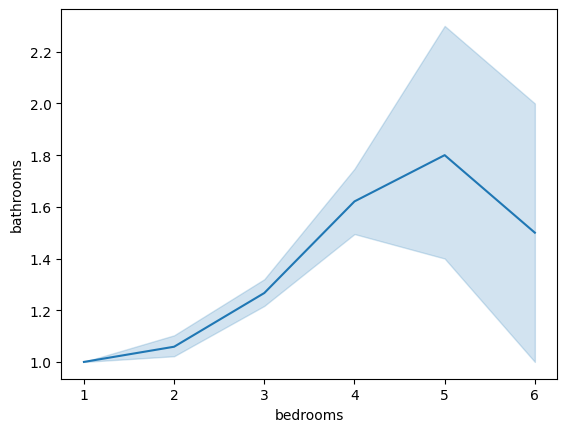

In [ ]:
sns.lineplot(df , x='bedrooms' ,y='bathrooms')

<Axes: >

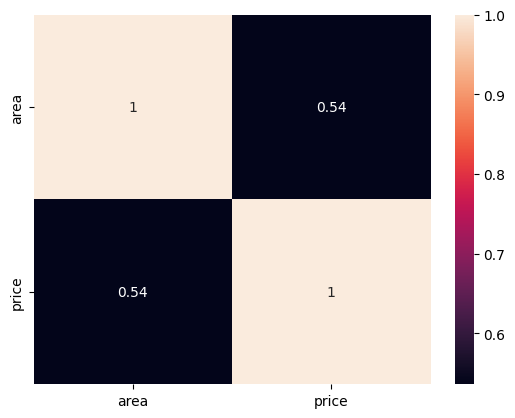

In [ ]:
corr_matrix = df[['area', 'price']].corr()
sns.heatmap(corr_matrix, annot=True, )

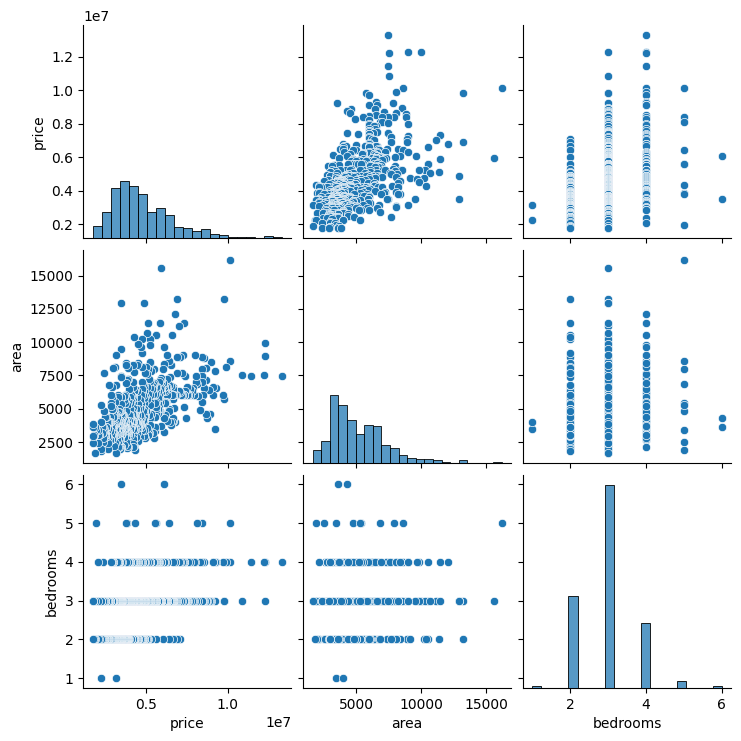

In [ ]:
sns.pairplot(df , vars = ['price' , 'area', 'bedrooms'])

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
missing = df.isnull().sum()
missing


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

<Axes: xlabel='price'>

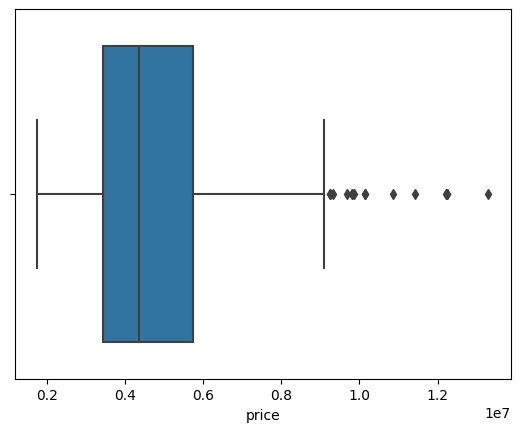

In [ ]:
sns.boxplot(df , x='price')

<Axes: xlabel='area'>

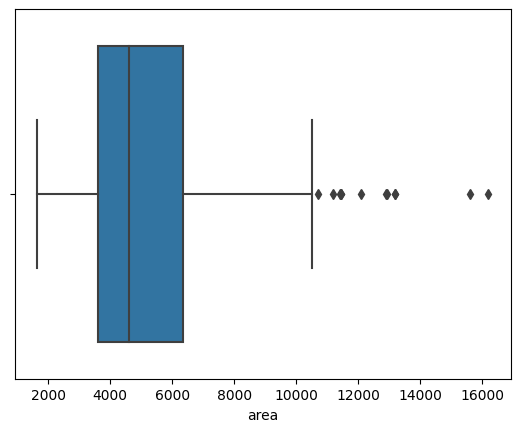

In [ ]:
sns.boxplot(df, x = 'area')

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
target = df['price']
df.drop('price' , axis=1 , inplace = True)



In [ ]:
#selected_cols = ['area' ,'bedrooms' ,'bathrooms','parking' ,'stories','furnishingstatus_furnished']
x_train , x_test , y_train , y_test = train_test_split(df , target, test_size=0.2)

print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))



Training set size: 436
Testing set size: 109


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mse


1948583864366.2612

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 937896.0144442715


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.6273784598401131
